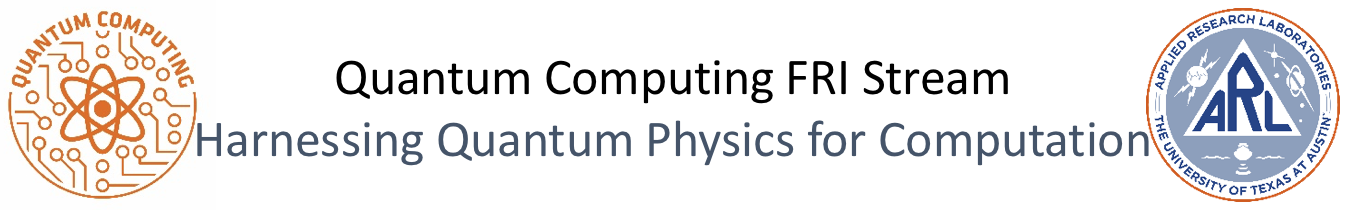

# <font color=green>Begin in class, complete for homework:</font>


## Quantum Teleportation, kind of

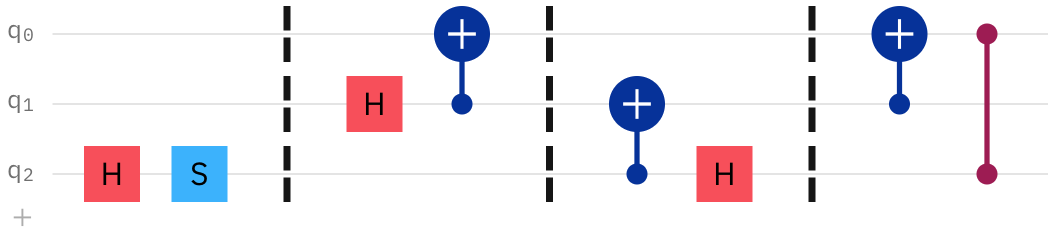

1. Use Qiskit to implement the teleportation protocol shown above.
2. Verify that q[2] was correctly sent to q[0].  (How?)
3. __Interpret your results__.

4. Prepare a random qubit state using u(theta, phi, lambda) and teleport that state.

(__Note__: “lambda” is a reserved word in Python – don’t use it as a variable!)

In [1]:
%pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 6.9 MB/s 
     |████████████████████████████████| 18.0 MB 169 kB/s 
     |████████████████████████████████| 240 kB 58.9 MB/s 
     |████████████████████████████████| 112 kB 38.2 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 37.5 MB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 26.7 MB/s 
     |████████████████████████████████| 49 kB 3.5 MB/s 
     |████████████████████████████████| 943 kB 41.2 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 4.1 MB 46.5 MB/s 
     |████████████████████████████████| 112 kB 57.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.2-py3-none-any.whl size=12109 sha256=460b8836d78de9146da3a2ef729ba1d451b88f3b5f0f9a22e3a559f66d0200b5
  Stored in directory: /root/.cache/pip/wheels/e6/bd/f3/26c31

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('df3247c184f771c39a07da164bdf826756403a384a998b0e66574464b0df3dd7ce6f7f0a5f5142775de33b1d753a8c128c17fa14c98aaabde572871877ede6e9')

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q')

In [ ]:
backend = provider.get_backend('ibmq_lima')

In [2]:
%pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 9.4 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=4056aefd8accb41bbd6c41f658b9d07f495673013e12ec91b7194e086139824f
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [ ]:
backend=provider.get_backend('ibmq_qasm_simulator')
backend

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [ ]:
q = QuantumRegister(3)      #Quantum register with 3 qubits.
c = ClassicalRegister(3)    # Classical register with 3 bits.
qc = QuantumCircuit(q, c)   # Create a quantum circuit.

In [ ]:
#Make the right polarized state
qc.h(q[2])
qc.s(q[2])
qc.barrier(q)

#Initializes the Bell pair
qc.h(q[1])
qc.cnot(q[1], q[0])
qc.barrier(q)

#Perform Bell State Measurement
qc.cnot(q[2],q[1])
qc.h(q[2])
qc.barrier(q)

#Make corrections on q1 and q2
qc.cnot(q[1],q[0])
qc.cz(q[0],q[2])

#Measure in the H/V basis
qc.sdg(q[0])
qc.h(q[0])
qc.measure(q[0],c[0])

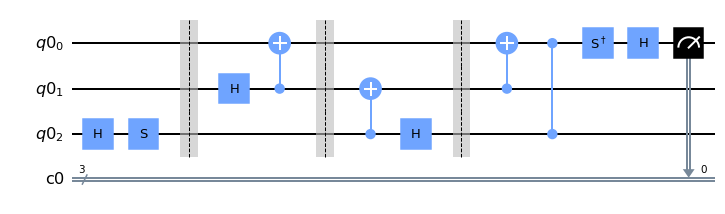

In [ ]:
qc.draw('mpl')

In [50]:
backend = Aer.get_backend('qasm_simulator')

In [ ]:
job = execute(qc, backend, shots=1024)
result = job.result()
counts=result.get_counts(qc)
print(counts)

{'000': 1024}


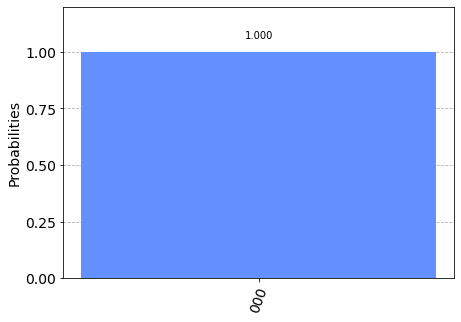

In [ ]:
plot_histogram(counts)

There was a 100% probability of the zero state. This is due to the application of the the S Dagger and Hadamard gates. This undoes the initial Hadamard and S gates (creating the right polarization state) which effectively allows us to measure in the H/V basis. Since horizontal corresponds to right polarization, obtaining a measurement of the zero state (horizontal) for qubit 0 means that we have obtained the right polarization state in qubit 0. Thus, we have teleported the qubit.

In [ ]:
q = QuantumRegister(3)      #Quantum register with 3 qubits.
c = ClassicalRegister(3)    # Classical register with 3 bits.
qc = QuantumCircuit(q, c)   # Create a quantum circuit.

In [ ]:
#Initialize unitary inputs
θ = np.pi/2
ϕ = np.pi
λ = np.pi

#Prepare state
qc.x(q[2])
qc.u(θ,ϕ,λ, q[2])
qc.barrier(q)

#Initializes the Bell pair
qc.h(q[1])
qc.cnot(q[1], q[0])
qc.barrier(q)

#Perform Bell State Measurement
qc.cnot(q[2],q[1])
qc.h(q[2])
qc.barrier(q)

#Make corrections on q1 and q2
qc.cnot(q[1],q[0])
qc.cz(q[0],q[2])

#Measure in H/V basis
qc.u(-θ,ϕ,λ, q[0]) #This applies the U dagger on qubit 0
qc.measure(q[0],c[0]) 

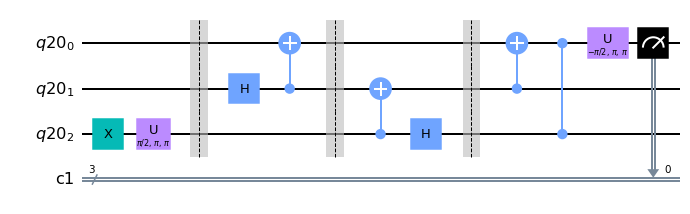

In [ ]:
qc.draw('mpl')

In [ ]:
job = execute(qc, backend, shots=1024)
result = job.result()
counts=result.get_counts(qc)
print(counts)

{'001': 1024}


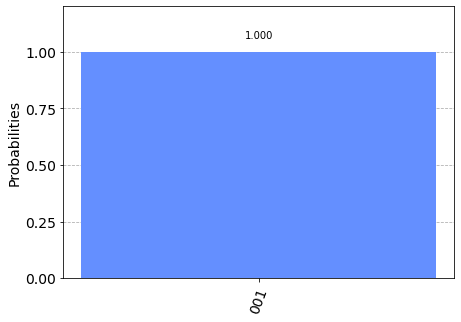

In [ ]:
plot_histogram(counts)

As we can see here, the teleportation was a success since we achieved the |001⟩ state with 100% probability. We initially prepared this state in qubit 2 but teleported it to qubit 0. Undoing the unitary was done by altering the inputs to, in a way, transpose the unitary (creating a unitary dagger).

## HW Part 2 - More Challenge!

#### Create a Python script that teleports a multi-qubit quantum state.

A basic outline of the steps is given below.

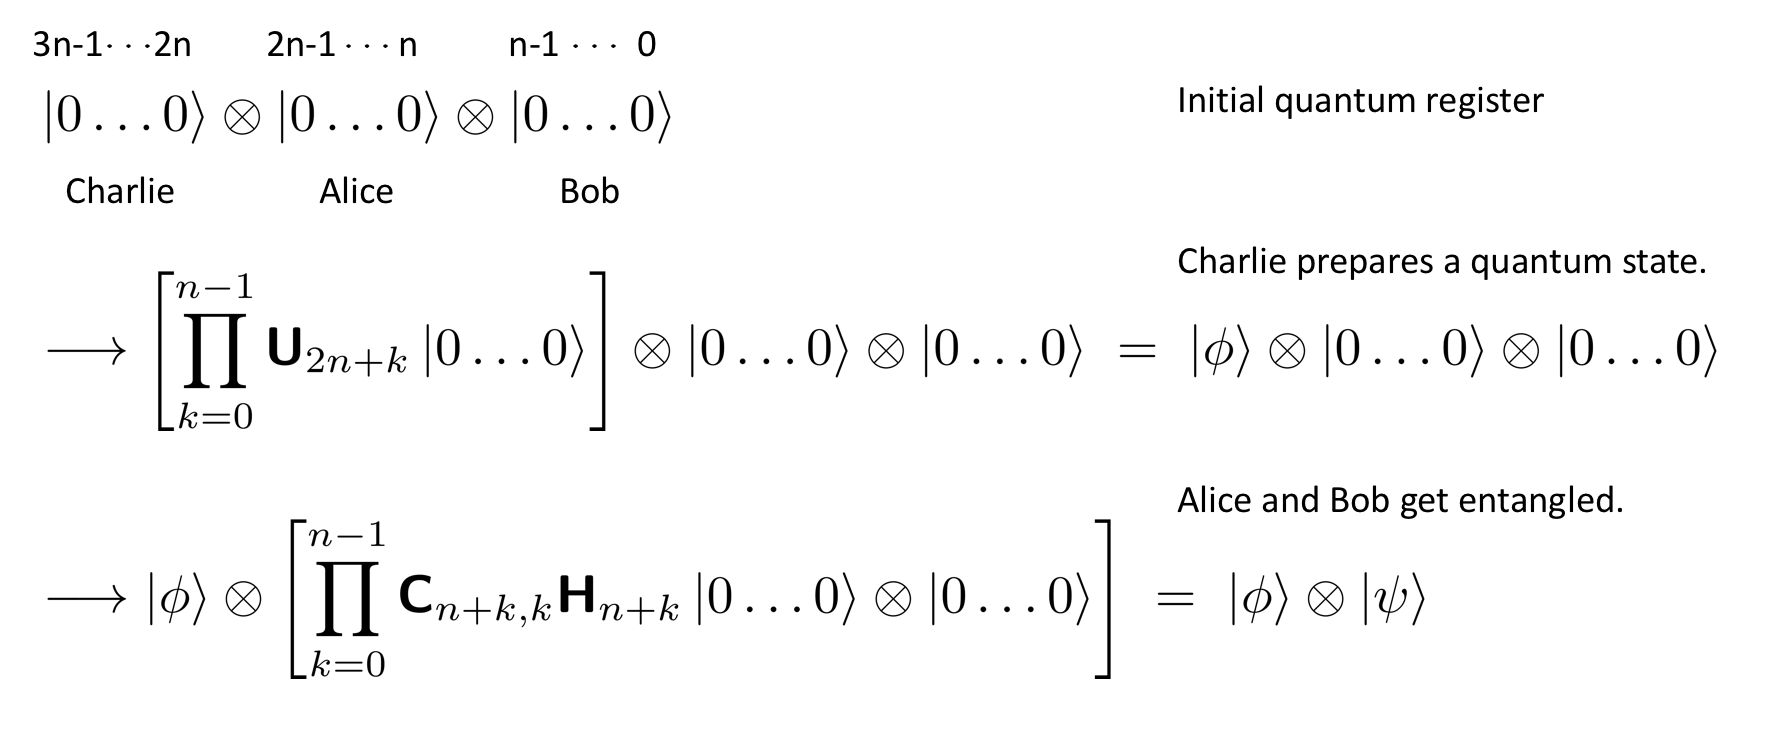

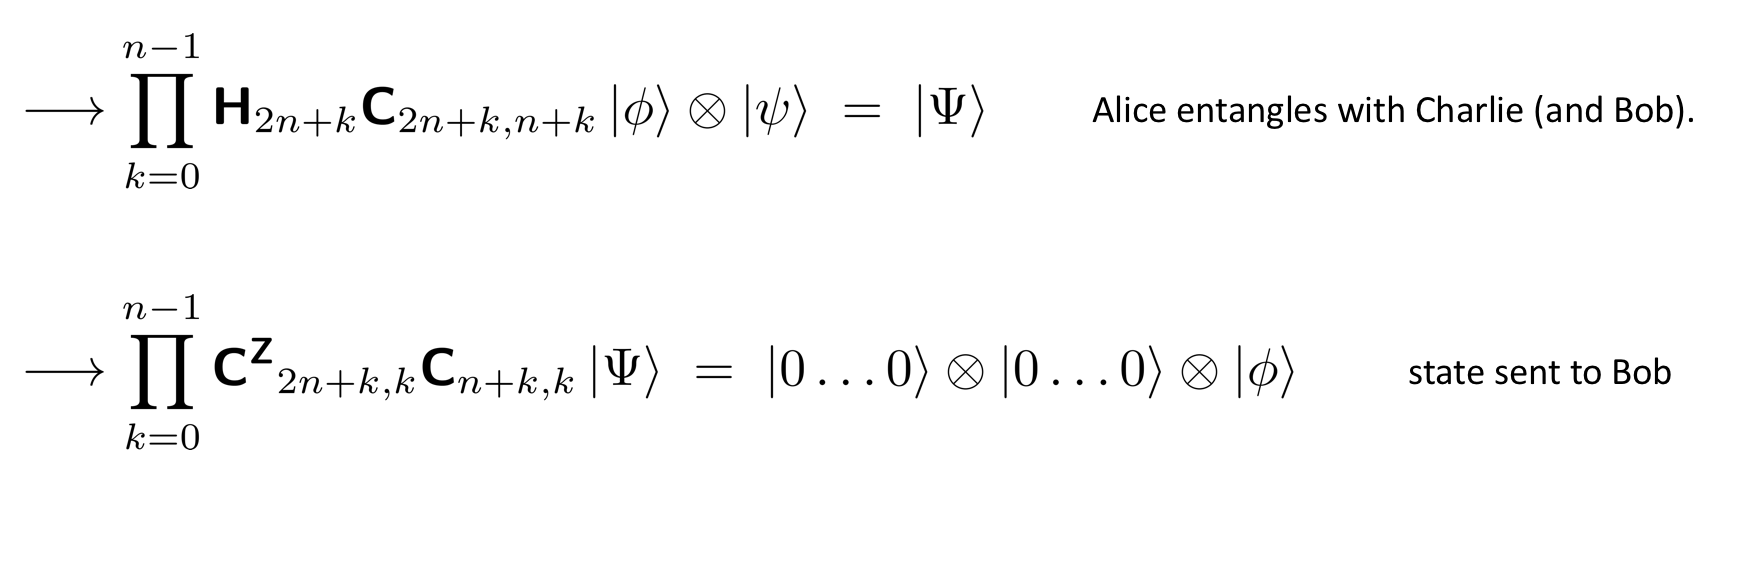

You may find it easier to implement this for a fixed number of qubits per party (for example 2 each, then 3 each) before going to the n-qubit case.

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [95]:
n = 3
q = QuantumRegister(3*n)      #Quantum register with n qubits.
c = ClassicalRegister(3*n)    #Classical register with n bits.
qc = QuantumCircuit(q, c)     #Create a quantum circuit.

In [96]:
#Initialize unitary inputs
θ = np.pi/2
ϕ = np.pi
λ = np.pi

#Charlie prepares a quantum state
for k in range(n):
  qc.u(θ,ϕ,λ, 2*n + k)

qc.barrier(q)

#Entangles Alice and Bob
for k in range(n):
  qc.h(n + k)
  qc.cx(n + k, k)

qc.barrier(q)

#Alice entangles with Charlie
for k in range (n):
  qc.cx(2*n + k, k)
  qc.h(2*n + k) 

  qc.barrier(q)

#State sent to Bob
for k in range(n):
  qc.cx(n + k, k)
  qc.cz(2*n + k, k)

qc.barrier(q)

#Measure in H/V basis
for k in range(n):
  qc.u(-θ,ϕ,λ, k)
qc.measure(q[0],c[0])

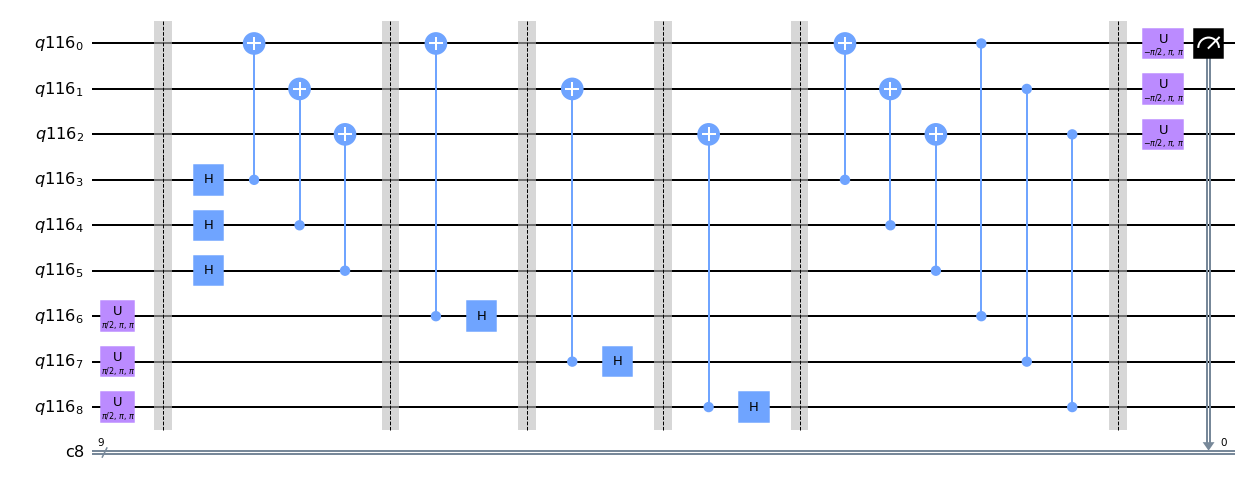

In [97]:
qc.draw('mpl')

In [93]:
job = execute(qc, backend, shots=1024)
result = job.result()
counts=result.get_counts(qc)
print(counts)

{'000': 1024}


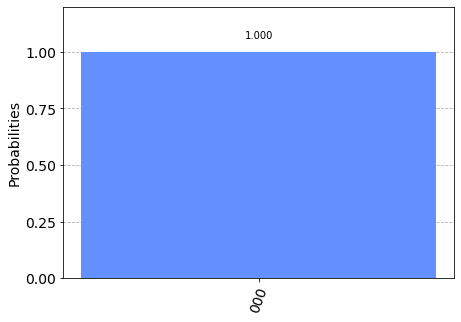

In [94]:
plot_histogram(counts)